### Моделирование равномерного дискретного распределения

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sns.set_theme('notebook') 
sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 8) 
 
from scipy.stats import randint

Попробуем рассчитать вероятности для случайной величины, которая принимает значения от 1 включительно до 7 не включительно 

(собственно, это как раз пример с пирожными)

In [2]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)

# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)

# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)
pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого x вероятность того, что случайная величина примет значение x или меньше:

In [3]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)
cdf

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

### Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.
Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [4]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)

# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)

# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)

# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


### Распределение Пуассона
это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

In [5]:
import scipy

scipy.stats.distributions.poisson.pmf(7, 4.5)

0.08236294962723255

Также можно смоделировать распределение Пуассона. Например, будем рассматривать 1000 реализаций случайной величины, у которой лямбда=3:

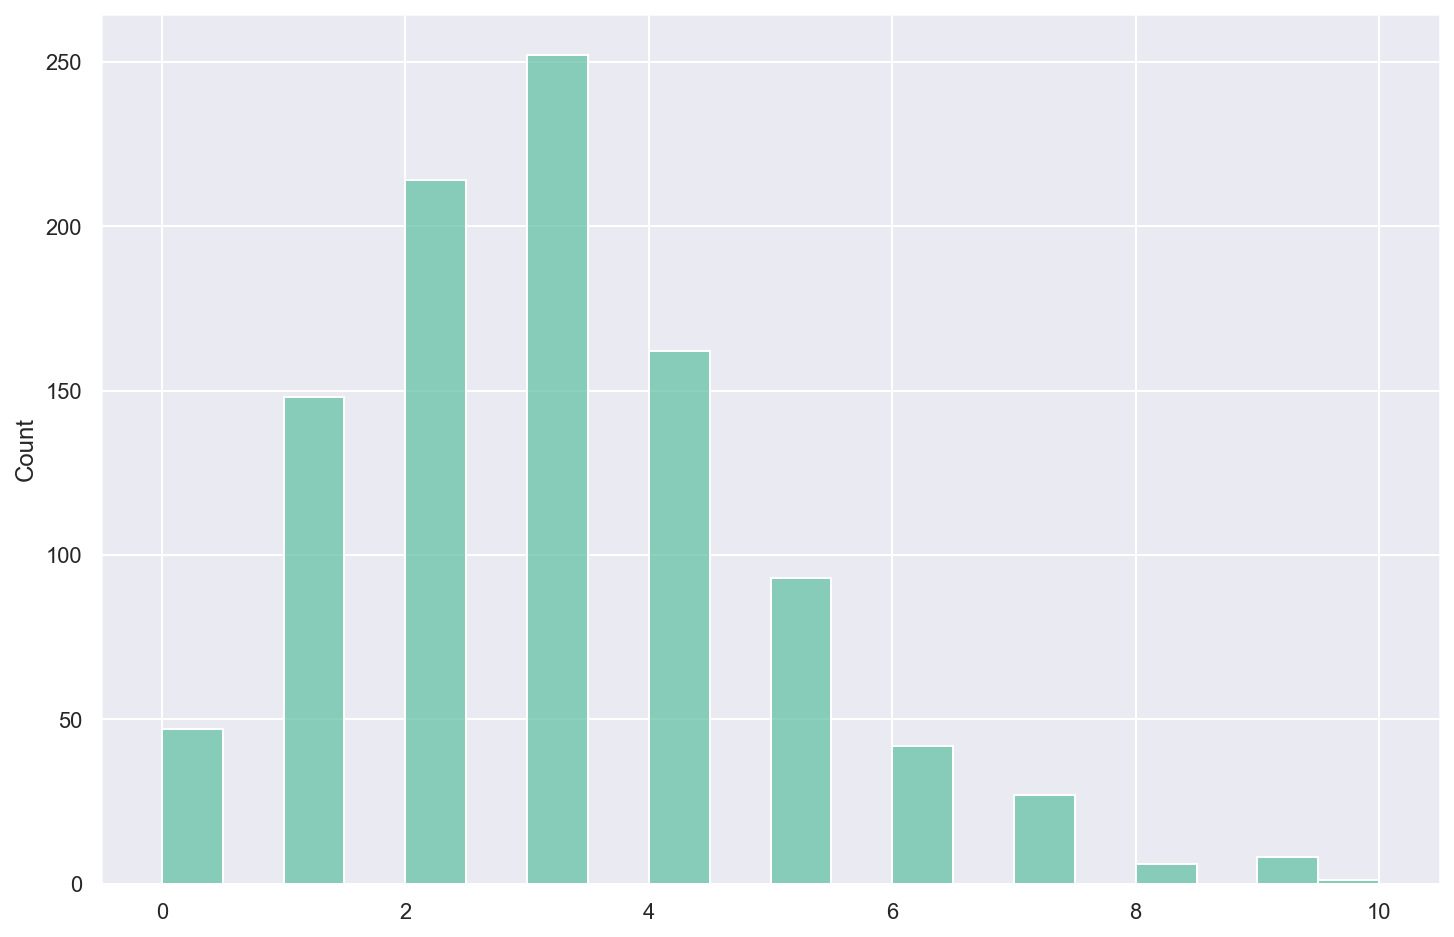

In [6]:
from numpy import random

sns.histplot(random.poisson(lam=3, size=1000), bins=20);

# Нормальное распределение
(его ещё называют гауссовским или распределением Гаусса) представляет собой распределение вероятностей, обычно используемое для моделирования таких явлений, как физические характеристики (например, рост, вес и т. д.) или результаты тестирований.

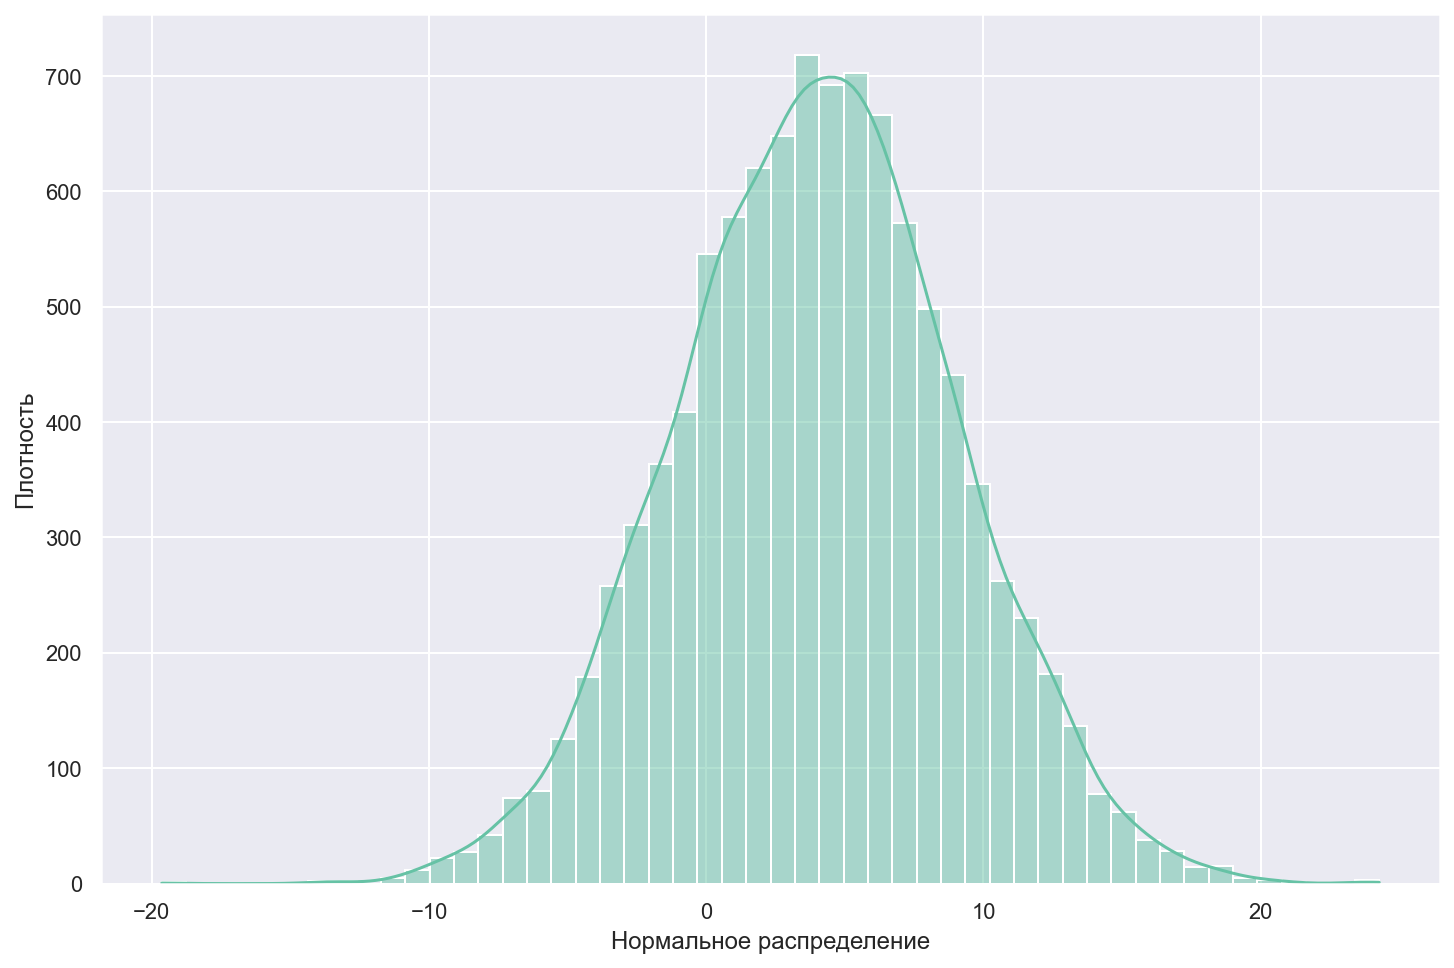

In [20]:
from scipy.stats import norm

data = norm.rvs(size=10000, loc=4, scale=5)
 
ax = sns.histplot(data, bins=50, kde=True)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность');

### Экспоненциальное распределение
это распределение вероятностей времени между событиями в процессе Пуассона.

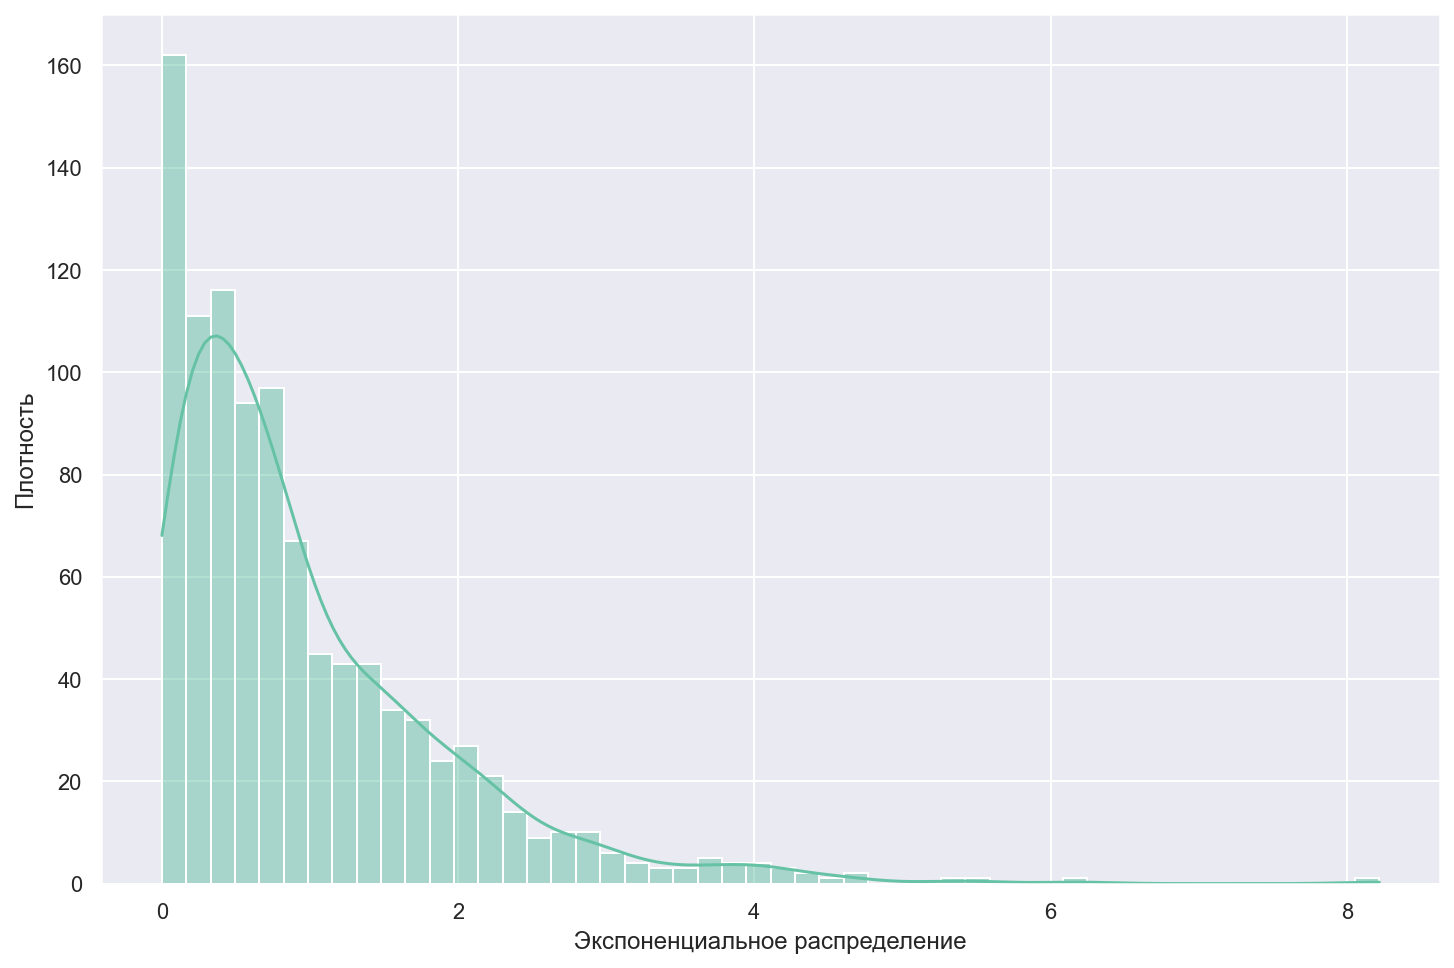

In [22]:
from scipy.stats import expon

data = expon.rvs(loc=0, scale=1, size=1000)
ax = sns.histplot(data, bins=50, kde=True)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность');

In [31]:
import math

lambda_ = 1/10
t = 7

probability = math.exp(-lambda_ * t)
print(round(probability, 3))

0.497


In [32]:
lambda_ = 1/10
t1 = 9
t2 = 11

probability = (1 - math.exp(-lambda_ * t2)) - (1 - math.exp(-lambda_ * t1))
print(round(probability, 3))

0.074
